In [20]:
pip install TextBlob

In [21]:
# get all the tweets based on the search query and analyse the sentiment of the tweets
import tweepy
import pandas as pd
import re
from textblob import TextBlob 

In [22]:
# keys and tokens from the Twitter Dev Console
consumer_key = "" # TWITTER_API_KEY
consumer_secret = "" # TWITTER_API_SECRET
access_key = "" # ACCESS_TOKEN
access_secret = "" # ACCESS_SECRET_TOKEN

In [41]:
def TwitterClient():
    # attempt authentication 
    try: 
        # create OAuthHandler object 
        auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
        # set access token and secret 
        auth.set_access_token(access_key, access_secret) 
        # create tweepy API object to fetch tweets 
        api = tweepy.API(auth, wait_on_rate_limit=True) 

    except: 
        print("Error: Authentication Failed") 

In [36]:
def clean_tweet(tweet): 
        ''' 
        Utility function to clean tweet text by removing links, special characters 
        using simple regex statements. 
        '''
        return ' '.join(re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)', ' ', tweet).split()) 

In [37]:
def get_tweet_sentiment(tweet): 
        ''' 
        Utility function to classify sentiment of passed tweet 
        using textblob's sentiment method 
        '''
        # create TextBlob object of passed tweet text 
        analysis = TextBlob(clean_tweet(tweet)) 
        # set sentiment 
        if analysis.sentiment.polarity > 0: 
            return 'positive'
        elif analysis.sentiment.polarity == 0: 
            return 'neutral'
        else: 
            return 'negative'

In [38]:
def get_tweets(query, count = 10): 
        ''' 
        Main function to fetch tweets and parse them. 
        '''
        # empty list to store parsed tweets 
        tweets = [] 
  
        try: 
            # call twitter api to fetch tweets 
            fetched_tweets = api.search(q = query, count = count) 
  
            # parsing tweets one by one 
            for tweet in fetched_tweets: 
                # empty dictionary to store required params of a tweet 
                parsed_tweet = {} 
  
                # saving text of tweet 
                parsed_tweet['text'] = tweet.text 
                # saving sentiment of tweet 
                parsed_tweet['sentiment'] = get_tweet_sentiment(tweet.text) 
  
                # appending parsed tweet to tweets list 
                if tweet.retweet_count > 0: 
                    # if tweet has retweets, ensure that it is appended only once 
                    if parsed_tweet not in tweets: 
                        tweets.append(parsed_tweet) 
                else: 
                    tweets.append(parsed_tweet) 
  
            # return parsed tweets 
            return tweets 
  
        except tweepy.TweepError as e: 
            # print error (if any) 
            print("Error : " + str(e)) 

In [51]:
def main(search_query): 
    # creating object of TwitterClient Class 
    api = TwitterClient() 
    # calling function to get tweets 
    tweets = get_tweets(query = search_query, count = 200) 
  
    # picking positive tweets from tweets 
    ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive'] 
    ptweets_count = 100*len(ptweets)/len(tweets)
    # percentage of positive tweets 
    print("Positive tweets percentage: {} %".format(ptweets_count)) 
    # picking negative tweets from tweets 
    ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative'] 
    ntweets_count = 100*len(ntweets)/len(tweets)
    # percentage of negative tweets 
    print("Negative tweets percentage: {} %".format(ntweets_count)) 
    # percentage of neutral tweets 
    neutral_count = 100*(len(tweets) -(len( ntweets )+len( ptweets)))/len(tweets)
    print("Neutral tweets percentage: {} %".format(neutral_count)) 
    
    #plot the values in Pie Chart 
    
    df = pd.DataFrame([ptweets_count, ntweets_count, neutral_count], index=['Positive Tweets', 'Negative Tweets', 'Neutral Tweets'], columns=['Sentiment'])
    df.plot.pie(subplots=True)
    
    # Area Chart
    df.plot.area()
    
    # printing first 5 positive tweets 
    print("\n\nPositive tweets:") 
    for tweet in ptweets[:10]: 
        print(tweet['text']) 
  
    # printing first 5 negative tweets 
    print("\n\nNegative tweets:") 
    for tweet in ntweets[:10]: 
        print(tweet['text']) 

Positive tweets percentage: 32.95454545454545 %
Negative tweets percentage: 3.409090909090909 %
Neutral tweets percentage: 63.63636363636363 %


Positive tweets:
@WP_Hans @MSEdgeDev Thanks @WP_Hans! Do you have any Galaxy devices in particular you'd like to test? We currently… https://t.co/KNoehifWVF
@JenMsft @MicrosoftEdge @windowsinsider @Windows  When can we finally get the new Microsoft Edge (Chromium-based) i… https://t.co/0Mm6P4Rvjd
People who say Google Chrome is better than Microsoft Edge Chromium, really don’t know what they are talking about.… https://t.co/EClx3hN3sw
RT @EdgeDevTools: 🆕📕 New to docs: Snippets are a way to store, edit and run bits of JavaScript to execute in the context of the currently o…
🆕📕 New to docs: Snippets are a way to store, edit and run bits of JavaScript to execute in the context of the curre… https://t.co/o46Z95TupN
Após ganhar versão baseada em Chromium, o navegador do Windows está se tornando mais popular; saiba ... (https://t.co/XB5JPQk3Xa)
@ini

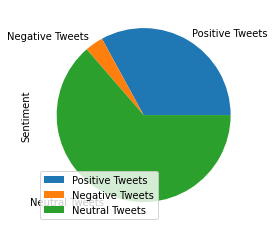

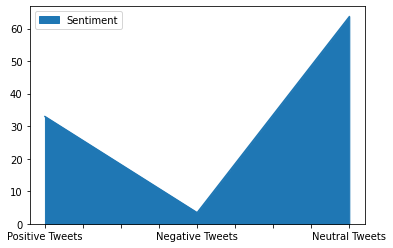

In [52]:
if __name__ == "__main__": 
    # calling main function 
    query = 'Microsoft Edge Chromium'
    main(search_query = query) 